In [22]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
#reading my data
path = r"c:\Users\Ahmed\Desktop\Project Mats\Metrics.csv"
df = pd.read_csv(path)
#Drop rows where CLV is negative(outliers)
df = df[df['CLV'] >= 0]

In [ ]:
#This is Metrics/CLV data 
df

,TotalSales,Frequency,AverageOrderValue,LifeSpan,CLV
0,0.00,2,0.000000,1,0.00
1,1191.68,4,297.920000,50,59584.00
2,1723.92,3,574.640000,1,1723.92
3,2585.12,4,646.280000,1,2585.12
4,4965.45,12,413.787500,47,233376.15
...,...,...,...,...,...
1207,12.26,1,12.260000,15,183.90
1208,356.80,2,178.400000,1,356.80
1209,366.87,5,73.374000,31,11372.97
1210,9.30,1,9.300000,1,9.30


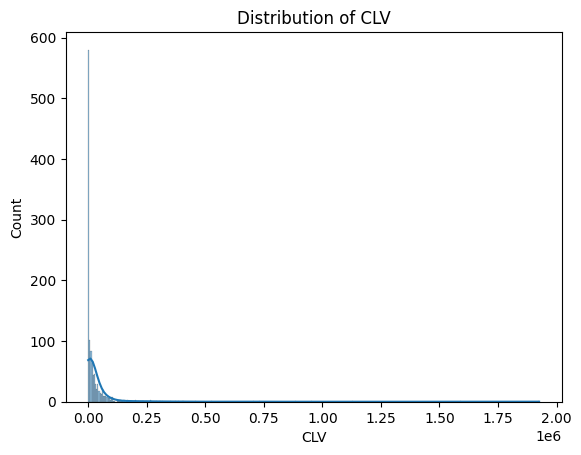

In [25]:
#the histogram before log transformation,right skewed distribution
#which means our CLV standard diviation is big which makes our pridictions not as performant
sns.histplot(df['CLV'],kde=True)
plt.title('Distribution of CLV')
plt.show()

In [ ]:
#log transformation 
df["Log_CLV"] = np.log1p(df["CLV"])

Series([], Name: Log_CLV, dtype: float64)

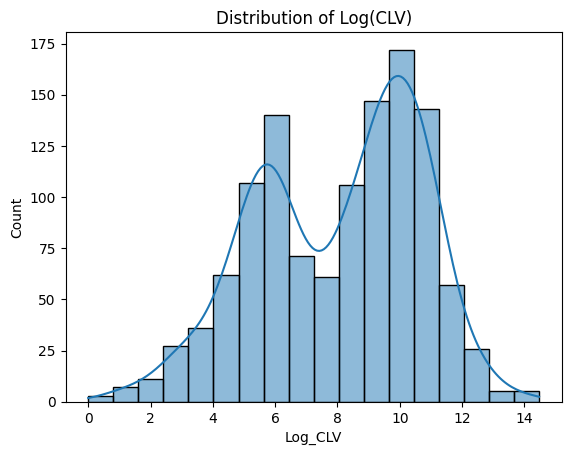

In [27]:
#creating another histogram after log transoformation,bimodal distribution
#the diviation here is lower and more close which makes it good for future predictive analytics (regression)
sns.histplot(df['Log_CLV'], kde=True)
plt.title('Distribution of Log(CLV)')
plt.show()

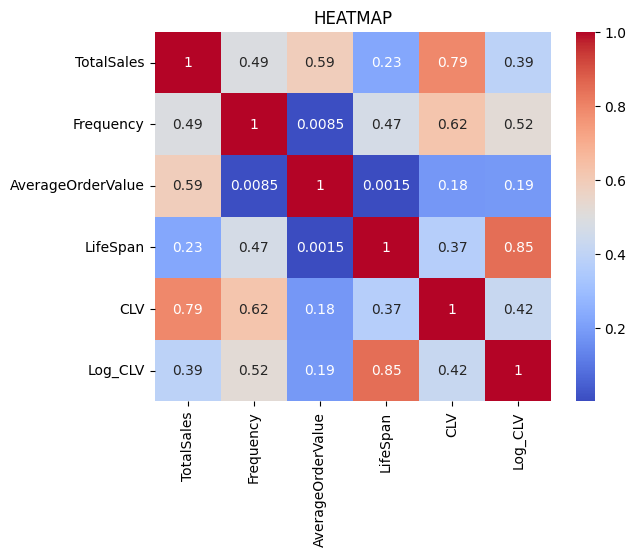

In [28]:
#creating new df without CustomerID column as it is not related to our correlation heatmap
cleaneddf = df.drop(columns=['CustomerID'])
#heatmap to find correlations (gives useful insights for pridictions)
sns.heatmap(cleaneddf.corr(), annot=True, cmap="coolwarm")
plt.title('HEATMAP')
plt.show()